Metadata Exploration iHMP

In [109]:
# Libraries
import pandas as pd
import seaborn as sns
import numpy as np

In [47]:
# Read in metadata for timing of samples
meta = pd.read_csv('../../../hmp2/data/hmp2_metadata.csv')
meta.shape

/Users/allen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (12,13,14,40,46,55,65,66,67,68,177,294,298,299,300,301,304,305,306,307,308,309,310,318,320,328,330,346,348,350,352,354,359,361,363,366,373,377,381,383,418,419,432,433,434,435,436,438,439,440,441,442,444,445,446,447,448,450,451,452,453,454) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(5533, 490)

In [5]:
[p for p in meta.columns]

['Project',
 'External ID',
 'Participant ID',
 'site_sub_coll',
 'data_type',
 'week_num',
 'date_of_receipt',
 'interval_days',
 'visit_num',
 'Research Project',
 'PDO Number',
 'GSSR IDs',
 'Product',
 'LCSET',
 'Aggregated Lanes',
 'WR ID',
 '# Lanes in Aggregation',
 'reads_raw',
 'reads_filtered',
 'reads_qc_fail',
 'reads_human',
 'reads_ribosomal',
 'reads_viral',
 'Delta',
 'IntervalName',
 'IntervalSequence',
 'ProjectSpecificID',
 'site_name',
 'Age at diagnosis',
 'Has the subject had a cholecystectomy?',
 'Has the subject had a prior abdominal surgery (other)?',
 'Has the next visit been scheduled?',
 'Has the subject been given new stool kits?',
 'Has the subject completed the FFQ/YAQ?',
 'Education Level',
 'Occupation',
 'Scanned FFQ/YAQ document:',
 'FFQ/YAQ results:',
 'Has the subject had an appendectomy?',
 'Has the subject had a tonsillectomy?',
 'biopsy_location',
 'Were study bloods drawn?',
 'Whole blood received at Broad:',
 'Serum tube #1 received at CSMC:',


In [ ]:
# 'General wellbeing', 'Abdominal pain', 'hbi'

In [7]:
meta[[ 'In the past 7 days, I felt worthless...',
 'I felt helpless...',
 'I felt depressed...',
 'I felt hopeless...',
 'I felt like a failure...',
 'I felt unhappy...',
 'I felt that I had nothing to look forward to...',
 'I felt that nothing could cheer me up...']].dropna().head()

,"In the past 7 days, I felt worthless...",I felt helpless...,I felt depressed...,I felt hopeless...,I felt like a failure...,I felt unhappy...,I felt that I had nothing to look forward to...,I felt that nothing could cheer me up...
185,Never,Never,Rarely,Never,Never,Rarely,Never,Never
187,Never,Never,Never,Never,Never,Never,Never,Never
189,Never,Never,Never,Never,Never,Rarely,Never,Never
191,Never,Never,Never,Never,Never,Never,Never,Never
192,Rarely,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Never


In [9]:
meta[[ 'Has the subject experienced a flare since the last study visit?',
 'If yes, how many times?']].dropna().head()

,Has the subject experienced a flare since the last study visit?,"If yes, how many times?"
269,Yes,1.0
4648,Yes,1.0


In [11]:
meta[['is_inflamed']].value_counts()

is_inflamed
Yes            813
No              68
dtype: int64

In [14]:
meta[['General well being over the past 24 hours']].value_counts()

General well being over the past 24 hours
Very well                                    730
Slightly below par                           540
Poor                                          54
Very poor                                      7
Terrible                                       4
dtype: int64

In [17]:
meta[['SIBDQ Score']].value_counts()

SIBDQ Score
37.0           11
69.0            9
57.0            7
40.0            7
60.0            6
48.0            6
43.0            5
54.0            5
23.0            4
45.0            3
38.0            3
49.0            3
64.0            3
53.0            3
44.0            3
30.0            3
59.0            3
42.0            2
61.0            2
68.0            2
67.0            2
66.0            2
63.0            2
35.0            2
26.0            2
52.0            2
51.0            2
25.0            2
47.0            2
50.0            2
dtype: int64

In [22]:
# Take out columns of interest
cols = ['Participant ID',
        'In the past 7 days, I felt worthless...',
        'I felt helpless...',
        'I felt depressed...',
        'I felt hopeless...',
        'I felt like a failure...',
        'I felt unhappy...',
        'I felt that I had nothing to look forward to...',
        'I felt that nothing could cheer me up...']

meta[cols].dropna().head()

,Participant ID,"In the past 7 days, I felt worthless...",I felt helpless...,I felt depressed...,I felt hopeless...,I felt like a failure...,I felt unhappy...,I felt that I had nothing to look forward to...,I felt that nothing could cheer me up...
185,C3010,Never,Never,Rarely,Never,Never,Rarely,Never,Never
187,C3012,Never,Never,Never,Never,Never,Never,Never,Never
189,C3015,Never,Never,Never,Never,Never,Rarely,Never,Never
191,C3017,Never,Never,Never,Never,Never,Never,Never,Never
192,C3021,Rarely,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Never


In [74]:
# Specify columns of interest
cols = ['General wellbeing', 'Abdominal pain', 'hbi']

# Get list of IDs that track information
ids = meta[cols + ['Participant ID']].dropna()['Participant ID'].unique()
ids

# Also get list of external ids
e_ids = meta[cols+['External ID']].dropna()['External ID'].unique()
e_ids

array(['206615', '206614', '206695', ..., 'CSM79HL2', 'CSM79HNQ',
       'HSM67VE2'], dtype=object)

In [81]:
meta[cols + ['Participant ID', 'External ID']].head()

,General wellbeing,Abdominal pain,hbi,Participant ID,External ID
0,Slightly below par,Mild,2.0,C3001,206615
1,Slightly below par,Mild,2.0,C3001,206614
2,NaN,NaN,NaN,C3002,206617
3,NaN,NaN,NaN,C3002,206619
4,NaN,NaN,NaN,C3002,206616


In [75]:
# Read in metabolomics data
mbx = pd.read_csv('../../../hmp2/data/seq/ibdmdb/public/HMP2/Metabolites/1723/HMP2_metabolomics.csv')

/Users/allen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [76]:
e_ids[0]

'206615'

In [79]:
# Subset columns to only include metabolites for ids of interest
mbx.columns.isin(e_ids)

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False, False,  True, False,  True, False,  True, False,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True, False, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True, False, False, False,  True, False,  True,  True, False,
       False,  True, False, False,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True, False,  True, False,
        True,  True, False, False, False,  True,  True,  True, False,
        True,  True,  True,  True, False, False,  True, False, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,

In [82]:
# Grab one specific metabolite 
mbx = mbx.iloc[0, 7:]
mbx.head()

HSM5FZBJ    4355470.0
MSM5FZ9X    2623839.0
CSM5FZ3N     942546.0
ESM5MEDZ    5759125.0
MSM5FZA2    2231416.0
Name: 0, dtype: object

In [83]:
# Subset metadata to appropriate samples and columns of interest
meta_sub = meta[meta['External ID'].isin(mbx.index)][['External ID', 'Participant ID', 
                                                 'date_of_receipt', 'diagnosis'] + cols]
meta_sub.set_index('External ID', inplace = True)

# Merge metabolomics info to metadata
df = (meta_sub.merge(mbx, left_index = True, 
           right_index = True).
      drop_duplicates().
      rename(columns = {'Participant ID': 'id',
                        'date_of_receipt': 'date',
                        0: 'intensity'}))

# Fix the date column
df.date = pd.to_datetime(df.date)

In [84]:
df.head()

,id,date,diagnosis,General wellbeing,Abdominal pain,hbi,intensity
CSM5FZ3N,C3001,2014-03-14,CD,Slightly below par,Mild,4.0,942546.0
CSM5FZ3T,C3002,2014-04-29,CD,Poor,Moderate,9.0,470132.0
CSM5FZ44,C3002,2014-06-24,CD,Slightly below par,Moderate,7.0,720369.0
CSM5FZ48,C3003,2014-05-08,UC,NaN,NaN,NaN,1069292.0
CSM5FZ4A,C3004,2014-05-13,UC,NaN,NaN,NaN,1265301.0


/Users/allen/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hbi', ylabel='Density'>

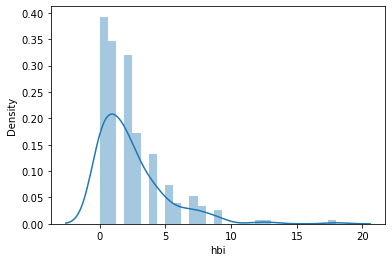

In [87]:
sns.distplot(df.hbi)

In [90]:
df.hbi.describe()

count    242.000000
mean       2.365702
std        2.582968
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       18.000000
Name: hbi, dtype: float64

In [93]:
df.head()

,id,date,diagnosis,General wellbeing,Abdominal pain,hbi,intensity
CSM5FZ3N,C3001,2014-03-14,CD,Slightly below par,Mild,4.0,942546.0
CSM5FZ3T,C3002,2014-04-29,CD,Poor,Moderate,9.0,470132.0
CSM5FZ44,C3002,2014-06-24,CD,Slightly below par,Moderate,7.0,720369.0
CSM5FZ48,C3003,2014-05-08,UC,NaN,NaN,NaN,1069292.0
CSM5FZ4A,C3004,2014-05-13,UC,NaN,NaN,NaN,1265301.0


In [105]:
df[['id', 'hbi']].groupby('id').count().reset_index().sort_values('hbi')

,id,hbi
105,P6038,0
70,M2039,0
81,M2072,0
80,M2071,0
35,H4008,0
...,...,...
7,C3009,6
17,C3023,7
87,M2085,7
32,H4004,7


In [106]:
df[df.id == 'H4001']

,id,date,diagnosis,General wellbeing,Abdominal pain,hbi,intensity
HSM5FZBJ,H4001,2014-03-12,CD,Poor,Moderate,8.0,4355470.0
HSM5FZBQ,H4001,2014-04-22,CD,Very Well,Mild,1.0,1976143.0
HSM5MD5K,H4001,2014-07-01,CD,Very Well,None,0.0,4544739.0
HSM5MD79,H4001,2014-11-04,CD,Very Well,None,0.0,818541.0
HSM5MD7H,H4001,2014-09-09,CD,Very Well,None,0.0,4495554.0
HSM5MD7J,H4001,2014-08-26,CD,Very Well,None,0.0,3663556.0
HSM5MD7W,H4001,2014-06-03,CD,Very Well,None,0.0,2416050.0
HSM67VEA,H4001,2015-01-28,CD,Slightly below par,Mild,3.0,1734827.0


In [110]:
# Now scale the dates compared to the earliest date
min_date = df.date.min()
df['days_from_start'] = (df.date - min_date).dt.days

# Make sure that intensities are numeric
df.intensity = df.intensity.astype('double')

# Then calculate the log of the intensities
df['log_intensity'] = np.log(df.intensity)

# Finally standardize the log values
log_intensity_mean = df.log_intensity.mean()
log_intensity_sd = df.log_intensity.std()
df['scaled_log_intensity'] = (df.log_intensity - log_intensity_mean)/log_intensity_sd
df.head()

,id,date,diagnosis,General wellbeing,Abdominal pain,hbi,intensity,days_from_start,log_intensity,scaled_log_intensity
CSM5FZ3N,C3001,2014-03-14,CD,Slightly below par,Mild,4.0,942546.0,93,13.756340,-0.409704
CSM5FZ3T,C3002,2014-04-29,CD,Poor,Moderate,9.0,470132.0,139,13.060769,-1.244306
CSM5FZ44,C3002,2014-06-24,CD,Slightly below par,Moderate,7.0,720369.0,195,13.487519,-0.732257
CSM5FZ48,C3003,2014-05-08,UC,NaN,NaN,NaN,1069292.0,148,13.882507,-0.258318
CSM5FZ4A,C3004,2014-05-13,UC,NaN,NaN,NaN,1265301.0,153,14.050821,-0.056363


<AxesSubplot:xlabel='days_from_start', ylabel='hbi'>

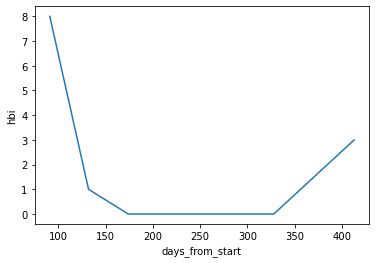

In [113]:
sns.lineplot(x = 'days_from_start',
             y = 'hbi',
             data = df[df.id == 'H4001'])